In [1]:
# from utils_processing.utils import read_concatenate_files
# from utils_processing.utils import create_sliding_windows_by_time
from utils_processing.utils import *
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

In [2]:
walking_files = ['Activity-Data/Walking/01/Walking01Acceleration.csv', 'Activity-Data/Walking/2/Walking2Acceleration.csv', 
                 'Activity-Data/Walking/3/Walking3Acceleration.csv', 'Activity-Data/Walking/04/Walking04Acceleration.csv',
                 'Activity-Data/Walking/5/Walking5Acceleration.csv']

In [3]:
climbing_files = ['Activity-Data/Climbing_Stairs/1/Climbing_Stairs1Acceleration.csv', 'Activity-Data/Climbing_Stairs/2/Climbing_Stairs2Acceleration.csv', 
                 'Activity-Data/Climbing_Stairs/3/Climbing_Stairs3Acceleration.csv', 'Activity-Data/Climbing_Stairs/5/Climbing_Stairs5Acceleration.csv',
                 'Activity-Data/Climbing_Stairs/6/Climbing_Stairs6Acceleration.csv', 'Activity-Data/Climbing_Stairs/7/Climbing_Stairs7Acceleration.csv']

In [4]:
downstairs_files = ['Activity-Data/Downstairs/1/Downstairs1Acceleration.csv', 'Activity-Data/Downstairs/2/Downstairs2Acceleration.csv', 
                 'Activity-Data/Downstairs/3/Downstairs3Acceleration.csv', 'Activity-Data/Downstairs/4/Downstairs4Acceleration.csv',
                 'Activity-Data/Downstairs/5/Downstairs5Acceleration.csv', 'Activity-Data/Downstairs/6/Downstairs6Acceleration.csv']

In [5]:
walking_frame = read_concatenate_files(walking_files, usecols=[0,1,2,3,5])
walking_frame.head()

,timestamp,accelerationX,accelerationY,accelerationZ,UUID
0,1503925783519,0.141306,3.056045,9.534574,1b63307ec4900338
1,1503925785576,0.366438,4.416416,7.860455,1b63307ec4900338
2,1503925786385,2.047742,1.137634,11.124866,1b63307ec4900338
3,1503925786633,-0.831072,3.884722,6.155200,1b63307ec4900338
4,1503925786869,-3.034490,1.980681,13.701907,1b63307ec4900338


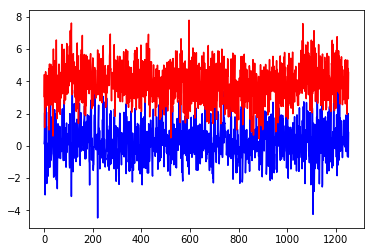

In [6]:
plt.plot(walking_frame['accelerationX'].values, c='b')
plt.plot(walking_frame['accelerationY'].values, c='r')

In [7]:
climbing_frame = read_concatenate_files(climbing_files, usecols=[0,1,2,3,5])
climbing_frame.head()

,timestamp,accelerationX,accelerationY,accelerationZ,UUID
0,1503926233187,1.774710,4.993616,7.944280,1b63307ec4900338
1,1503926233523,-0.196392,5.094207,9.374106,1b63307ec4900338
2,1503926233670,-0.182021,5.292994,8.212523,1b63307ec4900338
3,1503926233799,0.198787,5.079837,8.511900,1b63307ec4900338
4,1503926233858,0.196392,4.938530,9.115445,1b63307ec4900338


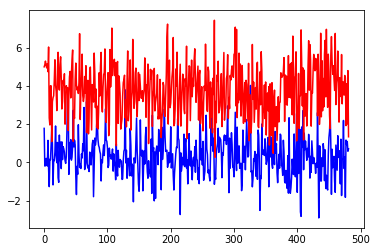

In [8]:
plt.plot(climbing_frame['accelerationX'].values, c='b')
plt.plot(climbing_frame['accelerationY'].values, c='r')

In [9]:
down_frame = read_concatenate_files(downstairs_files, usecols=[0,1,2,3,5])
down_frame.head()

,timestamp,accelerationX,accelerationY,accelerationZ,UUID
0,1503926414696,0.895737,4.157754,9.084310,1b63307ec4900338
1,1503926415811,0.014370,3.393743,9.874666,1b63307ec4900338
2,1503926416179,1.089734,3.451223,9.010064,1b63307ec4900338
3,1503926416377,0.196392,4.608018,9.491463,1b63307ec4900338
4,1503926416694,0.222737,3.712281,8.049661,1b63307ec4900338


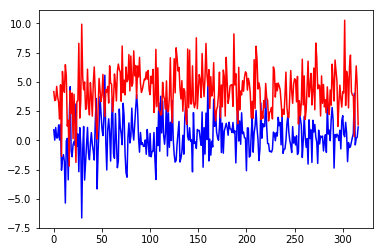

In [10]:
plt.plot(down_frame['accelerationX'].values, c='b')
plt.plot(down_frame['accelerationY'].values, c='r')

In [11]:
w_x_windows, w_x_ts_windows = create_sliding_windows_by_time(walking_frame, 1, 3000)
c_x_windows, c_x_ts_windows = create_sliding_windows_by_time(climbing_frame, 1, 3000)
d_x_windows, d_x_ts_windows = create_sliding_windows_by_time(down_frame, 1, 3000)

w_y_windows, w_y_ts_windows = create_sliding_windows_by_time(walking_frame, 2, 3000)
c_y_windows, c_y_ts_windows = create_sliding_windows_by_time(climbing_frame, 2, 3000)
d_y_windows, d_y_ts_windows = create_sliding_windows_by_time(down_frame, 2, 3000)

w_z_windows, w_z_ts_windows = create_sliding_windows_by_time(walking_frame, 3, 3000)
c_z_windows, c_z_ts_windows = create_sliding_windows_by_time(climbing_frame, 3, 3000)
d_z_windows, d_z_ts_windows = create_sliding_windows_by_time(down_frame, 3, 3000)

In [12]:
print(len(w_x_ts_windows), len(c_x_ts_windows), len(d_x_ts_windows))
print(len(w_y_ts_windows), len(c_y_ts_windows), len(d_y_ts_windows))
print(len(w_z_ts_windows), len(c_z_ts_windows), len(d_z_ts_windows))

59 32 27
59 32 27
59 32 27


In [13]:
walking_frame['label'] = 0
climbing_frame['label'] = 1
down_frame['label'] = 2
print(climbing_frame.tail())
print(walking_frame.tail())
print(down_frame.tail())

        timestamp  accelerationX  accelerationY  accelerationZ  \
51  1503926626088       1.163980       1.918411       6.804251   
52  1503926626327       0.922083       4.112249       9.498648   
53  1503926626618       1.089734       2.004632      10.200389   
54  1503926626896       0.577200       4.797225       7.254515   
55  1503926627264       0.704136       1.334026      12.652888   

               UUID   label  
51  1b63307ec4900338      1  
52  1b63307ec4900338      1  
53  1b63307ec4900338      1  
54  1b63307ec4900338      1  
55  1b63307ec4900338      1  
         timestamp  accelerationX  accelerationY  accelerationZ  \
191  1503926687631      -0.665815       5.304968       7.026988   
192  1503926688026       0.684976       4.172124       7.843689   
193  1503926688153       1.999841       4.787644       7.970625   
194  1503926688450      -0.696951       2.917134       7.383845   
195  1503926688829       0.821492       4.540957      11.704461   

                UUID

In [14]:
w_x_iqr = compute_inter_quartile_distance_window(w_x_windows)
w_y_iqr = compute_inter_quartile_distance_window(w_y_windows)
w_z_iqr = compute_inter_quartile_distance_window(w_z_windows)

c_x_iqr = compute_inter_quartile_distance_window(c_x_windows)
c_y_iqr = compute_inter_quartile_distance_window(c_y_windows)
c_z_iqr = compute_inter_quartile_distance_window(c_z_windows)

d_x_iqr = compute_inter_quartile_distance_window(d_x_windows)
d_y_iqr = compute_inter_quartile_distance_window(d_y_windows)
d_z_iqr = compute_inter_quartile_distance_window(d_z_windows)

In [15]:
w_x_skew = compute_skew_window(w_x_windows)
w_y_skew = compute_skew_window(w_y_windows)
w_z_skew = compute_skew_window(w_z_windows)

c_x_skew = compute_skew_window(c_x_windows)
c_y_skew = compute_skew_window(c_y_windows)
c_z_skew = compute_skew_window(c_z_windows)

d_x_skew = compute_skew_window(d_x_windows)
d_y_skew = compute_skew_window(d_y_windows)
d_z_skew = compute_skew_window(d_z_windows)


In [16]:
w_x_derivative = compute_sum_derivative_window(w_x_windows, w_x_ts_windows)
w_y_derivative = compute_sum_derivative_window(w_y_windows, w_y_ts_windows)
w_z_derivative = compute_sum_derivative_window(w_z_windows, w_z_ts_windows)

c_x_derivative = compute_sum_derivative_window(c_x_windows, c_x_ts_windows)
c_y_derivative = compute_sum_derivative_window(c_y_windows, c_y_ts_windows)
c_z_derivative = compute_sum_derivative_window(c_z_windows, c_z_ts_windows)

d_x_derivative = compute_sum_derivative_window(d_x_windows, d_x_ts_windows)
d_y_derivative = compute_sum_derivative_window(d_y_windows, d_y_ts_windows)
d_z_derivative = compute_sum_derivative_window(d_z_windows, d_z_ts_windows)

In [17]:
w_x_percentile = compute_percentile_norm_window(w_x_windows)
w_y_percentile = compute_percentile_norm_window(w_y_windows)
w_z_percentile = compute_percentile_norm_window(w_z_windows)

c_x_percentile = compute_percentile_norm_window(c_x_windows)
c_y_percentile = compute_percentile_norm_window(c_y_windows)
c_z_percentile = compute_percentile_norm_window(c_z_windows)

d_x_percentile = compute_percentile_norm_window(d_x_windows)
d_y_percentile = compute_percentile_norm_window(d_y_windows)
d_z_percentile = compute_percentile_norm_window(d_z_windows)

In [18]:
w_x_std = compute_std_deviation_window(w_x_windows)
w_y_std = compute_std_deviation_window(w_y_windows)
w_z_std = compute_std_deviation_window(w_z_windows)

c_x_std = compute_std_deviation_window(c_x_windows)
c_y_std = compute_std_deviation_window(c_y_windows)
c_z_std = compute_std_deviation_window(c_z_windows)

d_x_std = compute_std_deviation_window(d_x_windows)
d_y_std = compute_std_deviation_window(d_y_windows)
d_z_std = compute_std_deviation_window(d_z_windows)

In [19]:
w_x_kurt = compute_kurtosis_window(w_x_windows)
w_y_kurt = compute_kurtosis_window(w_y_windows)
w_z_kurt = compute_kurtosis_window(w_z_windows)

c_x_kurt = compute_kurtosis_window(c_x_windows)
c_y_kurt = compute_kurtosis_window(c_y_windows)
c_z_kurt = compute_kurtosis_window(c_z_windows)

d_x_kurt = compute_kurtosis_window(d_x_windows)
d_y_kurt = compute_kurtosis_window(d_y_windows)
d_z_kurt = compute_kurtosis_window(d_z_windows)


In [20]:
x_kurt = w_x_kurt + c_x_kurt + d_x_kurt
y_kurt = w_y_kurt + c_y_kurt + d_y_kurt
z_kurt = w_z_kurt + c_z_kurt + d_z_kurt

x_skew = w_x_skew + c_x_skew + d_x_skew
y_skew = w_y_skew + c_y_skew + d_y_skew
z_skew = w_z_skew + c_z_skew + d_z_skew

x_derivative = w_x_derivative + c_x_derivative + d_x_derivative
y_derivative = w_y_derivative + c_y_derivative + d_y_derivative
z_derivative = w_z_derivative + c_z_derivative + d_z_derivative

x_std = w_x_std + c_x_std + d_x_std
y_std = w_y_std + c_y_std + d_y_std
z_std = w_z_std + c_z_std + d_z_std

x_percentile = w_x_percentile + c_x_percentile + d_x_percentile
y_percentile = w_y_percentile + c_y_percentile + d_y_percentile
z_percentile = w_z_percentile + c_z_percentile + d_z_percentile

x_iqr = w_x_iqr + c_x_iqr + d_x_iqr
y_iqr = w_y_iqr + c_y_iqr + d_y_iqr
z_iqr = w_z_iqr + c_z_iqr + d_z_iqr

labels = [0 for i in range(len(w_x_skew))] + [1 for i in range(len(w_y_skew))] + [2 for i in range(len(w_z_skew))]

In [21]:
windows_x_map = { 0:{'values':x_skew, 'legend': 'skewness'}, 1:{'values':x_derivative, 'legend': 'gradient'},
               2:{'values':x_kurt, 'legend':'kurtosis'}, 3:{'values':x_std, 'legend':'std deviation'},
               4:{'values':x_percentile, 'legend':'percentile_windows'}, 5:{'values':x_iqr, 'legend': 'iqr'},
               6:{'values':labels, 'legend':'labels'}}

In [23]:
windows_y_map = { 0:{'values':y_skew, 'legend': 'skewness'}, 1:{'values':y_derivative, 'legend': 'gradient'},
               2:{'values':y_kurt, 'legend':'kurtosis'}, 3:{'values':y_std, 'legend':'std deviation'},
               4:{'values':y_percentile, 'legend':'percentile_windows'}, 5:{'values':y_iqr, 'legend': 'iqr'},
               6:{'values':labels, 'legend':'labels'}}

In [24]:
windows_z_map = { 0:{'values':z_skew, 'legend': 'skewness'}, 1:{'values':z_derivative, 'legend': 'gradient'},
               2:{'values':z_kurt, 'legend':'kurtosis'}, 3:{'values':z_std, 'legend':'std deviation'},
               4:{'values':z_percentile, 'legend':'percentile_windows'}, 5:{'values':z_iqr, 'legend': 'iqr'},
               6:{'values':labels, 'legend':'labels'}}

In [25]:
combos = list(combinations(list(range(6)), 2))
print(len(combos))

15


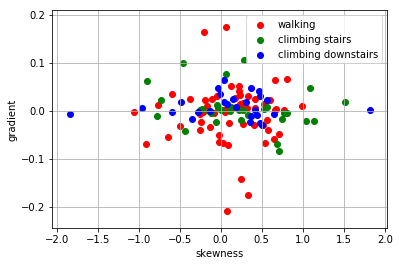

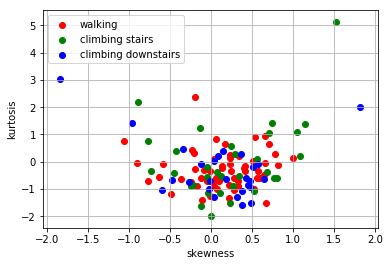

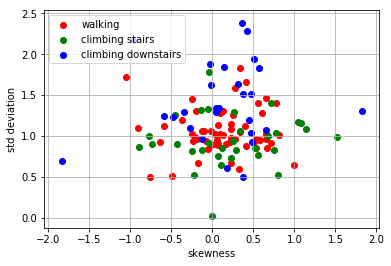

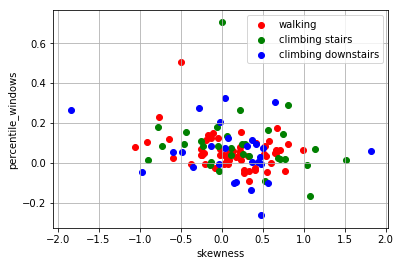

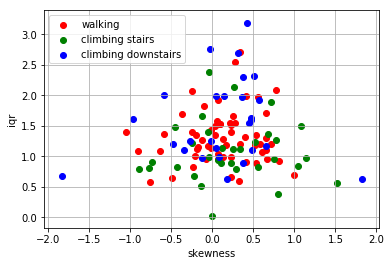

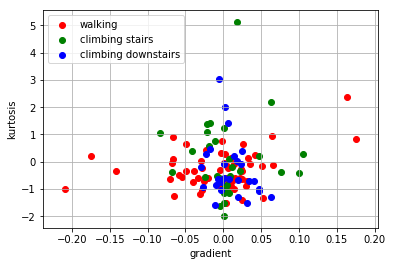

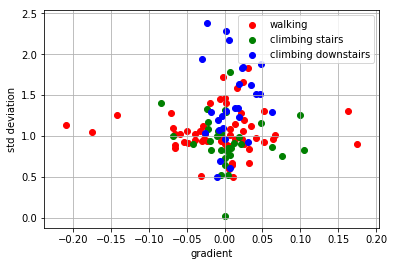

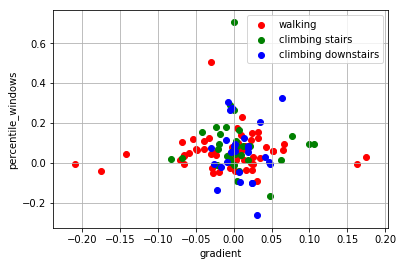

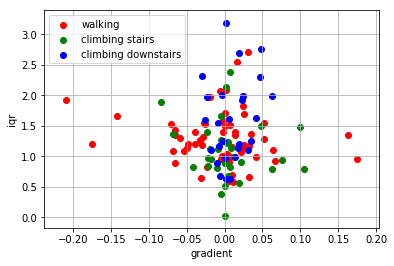

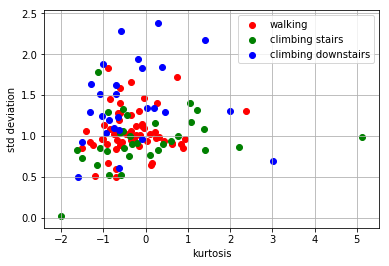

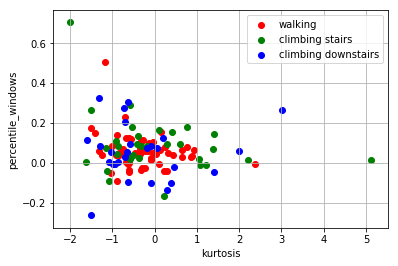

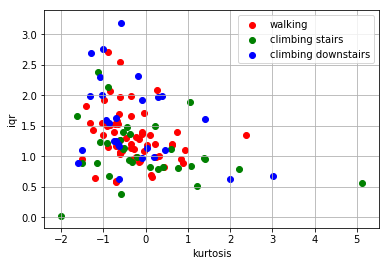

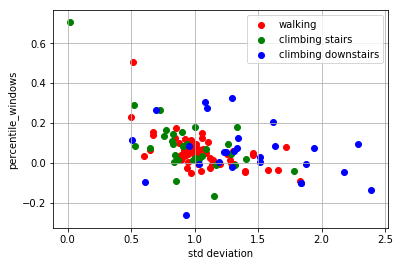

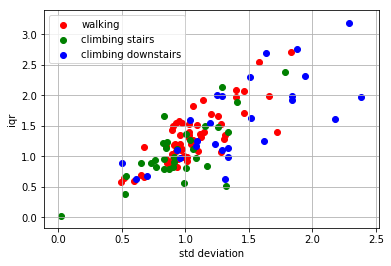

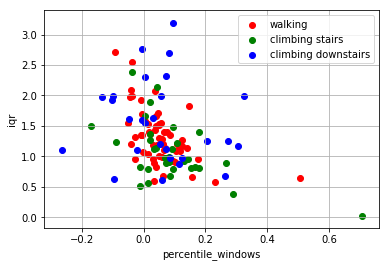

In [27]:
for combo in combos:
    fig = plt.figure()
    plt.scatter(windows_x_map[combo[0]]['values'][:len(w_x_skew)], windows_x_map[combo[1]]['values'][:len(w_x_skew)], c='r', label='walking')
    plt.scatter(windows_x_map[combo[0]]['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)], windows_x_map[combo[1]]['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)],c='g', label='climbing stairs')
    plt.scatter(windows_x_map[combo[0]]['values'][len(x_skew)-len(d_x_skew):], windows_x_map[combo[1]]['values'][len(x_skew)-len(d_x_skew):], c='b', label='climbing downstairs')    
    ax = plt.subplot()
    ax.set_xlabel(windows_x_map[combo[0]]['legend'])
    ax.set_ylabel(windows_x_map[combo[1]]['legend'])
    ax.legend()
    ax.grid(True)
    plt.show()

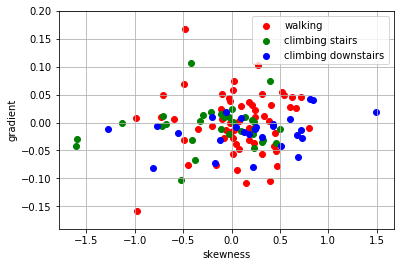

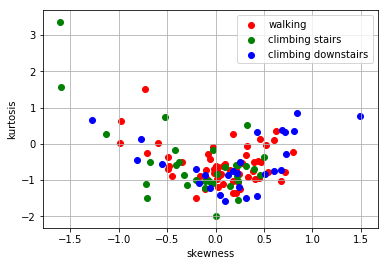

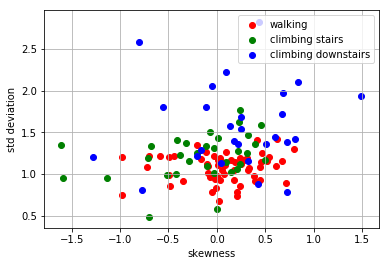

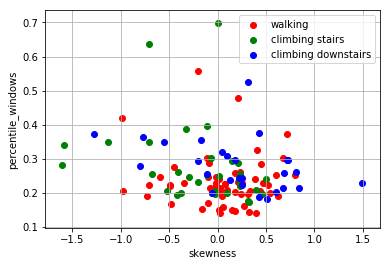

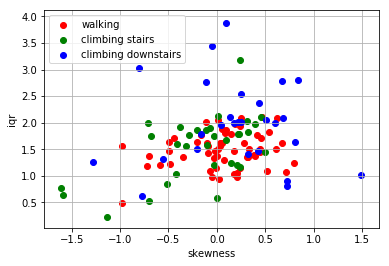

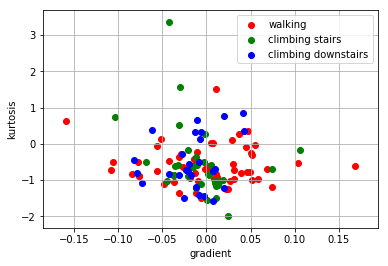

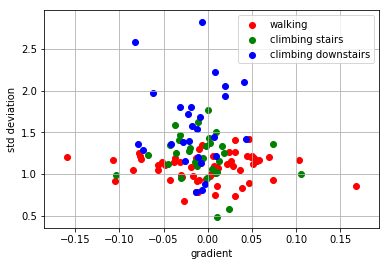

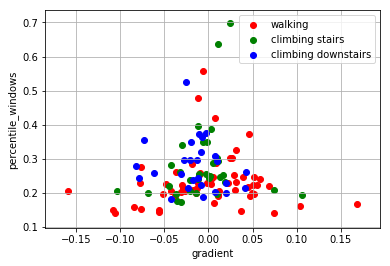

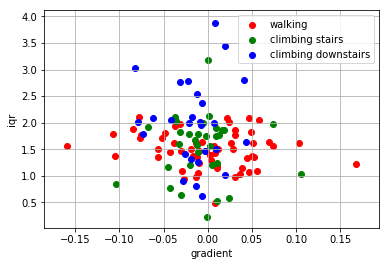

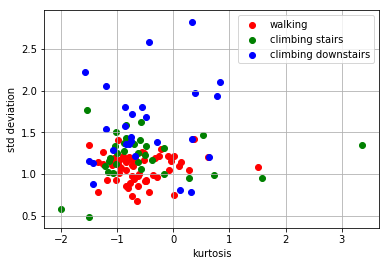

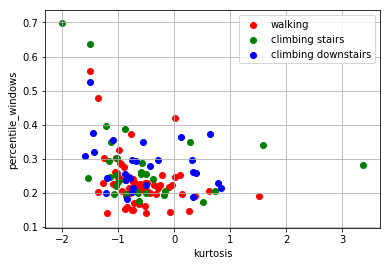

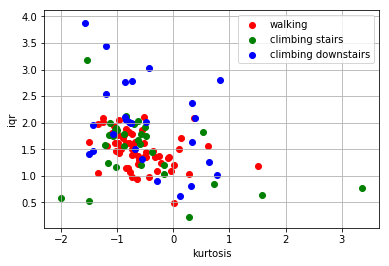

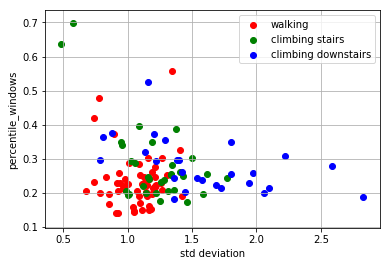

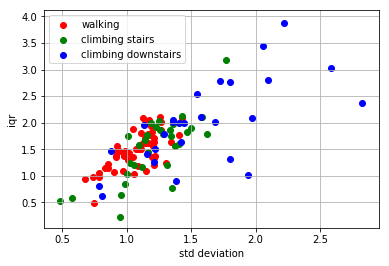

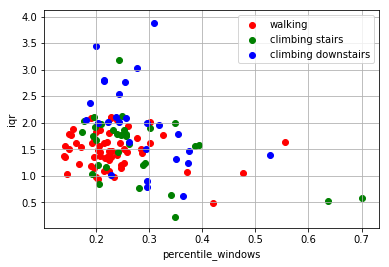

In [34]:
for combo in combos:
    fig = plt.figure()
    plt.scatter(windows_y_map[combo[0]]['values'][:len(w_x_skew)], windows_y_map[combo[1]]['values'][:len(w_x_skew)], c='r', label='walking')
    plt.scatter(windows_y_map[combo[0]]['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)], windows_y_map[combo[1]]['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)],c='g', label='climbing stairs')
    plt.scatter(windows_y_map[combo[0]]['values'][len(x_skew)-len(d_x_skew):], windows_y_map[combo[1]]['values'][len(x_skew)-len(d_x_skew):], c='b', label='climbing downstairs')    
    ax = plt.subplot()
    ax.set_xlabel(windows_y_map[combo[0]]['legend'])
    ax.set_ylabel(windows_y_map[combo[1]]['legend'])
    ax.legend()
    ax.grid(True)
    plt.show()

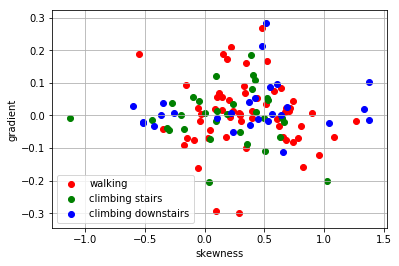

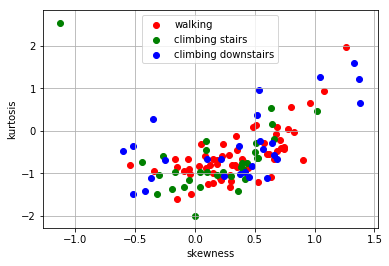

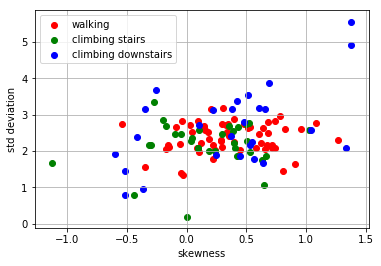

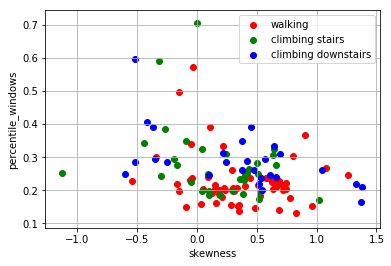

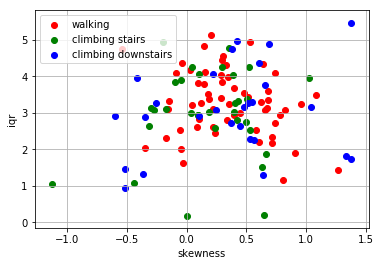

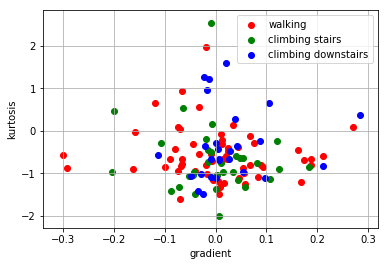

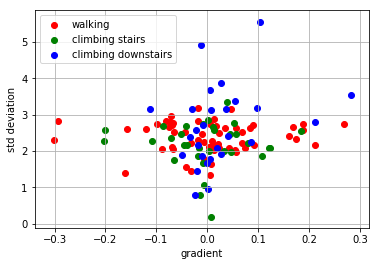

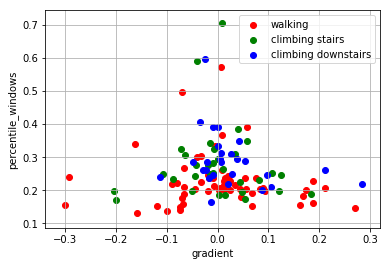

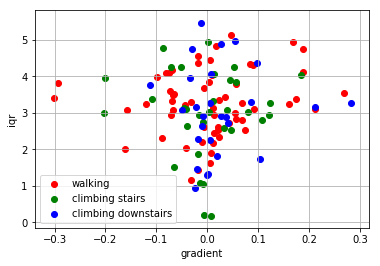

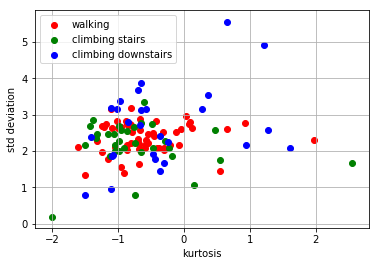

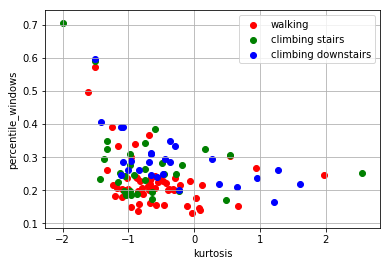

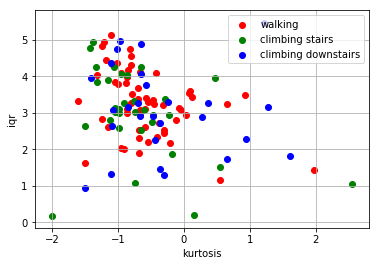

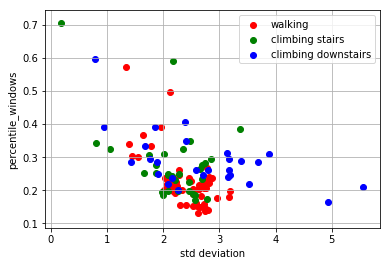

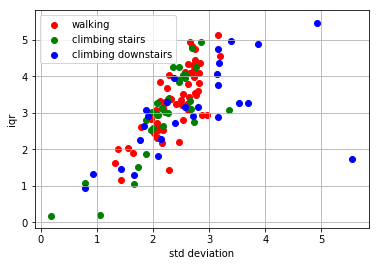

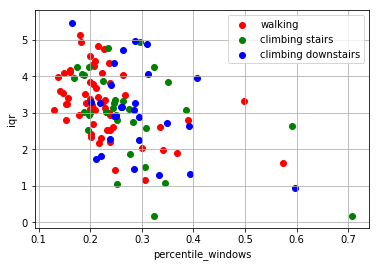

In [35]:
for combo in combos:
    fig = plt.figure()
    plt.scatter(windows_z_map[combo[0]]['values'][:len(w_x_skew)], windows_z_map[combo[1]]['values'][:len(w_x_skew)], c='r', label='walking')
    plt.scatter(windows_z_map[combo[0]]['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)], windows_z_map[combo[1]]['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)],c='g', label='climbing stairs')
    plt.scatter(windows_z_map[combo[0]]['values'][len(x_skew)-len(d_x_skew):], windows_z_map[combo[1]]['values'][len(x_skew)-len(d_x_skew):], c='b', label='climbing downstairs')    
    ax = plt.subplot()
    ax.set_xlabel(windows_z_map[combo[0]]['legend'])
    ax.set_ylabel(windows_z_map[combo[1]]['legend'])
    ax.legend()
    ax.grid(True)
    plt.show()

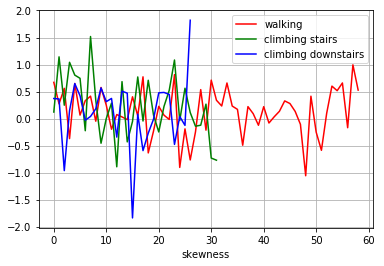

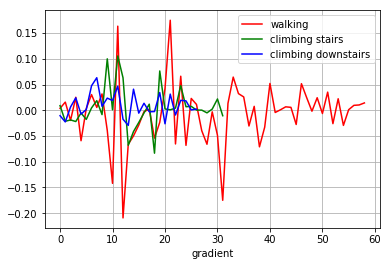

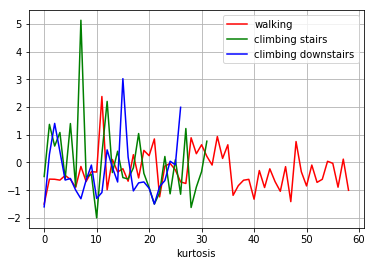

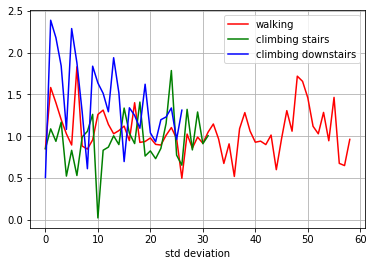

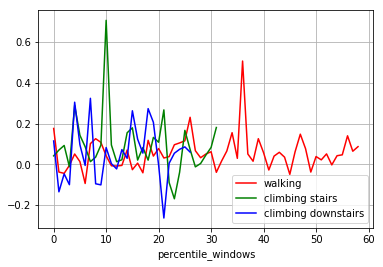

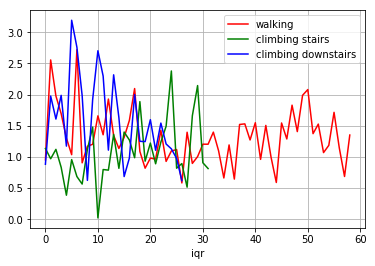

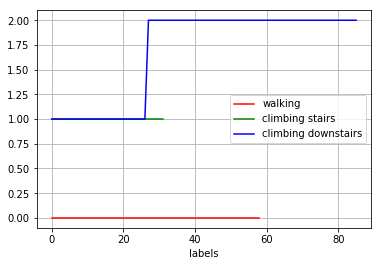

In [31]:
for dict_values in windows_x_map.values():
    fig = plt.figure()
    plt.plot(dict_values['values'][:len(w_x_skew)], c='r', label='walking')
    plt.plot(dict_values['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)],c='g', label='climbing stairs')
    plt.plot(dict_values['values'][len(x_skew)-len(d_x_skew):], c='b', label='climbing downstairs')    
    ax = plt.subplot()
    ax.set_xlabel(dict_values['legend'])
#     ax.set_ylabel(windows_x_map[combo[1]]['legend'])
    ax.legend()
    ax.grid(True)
    plt.show()

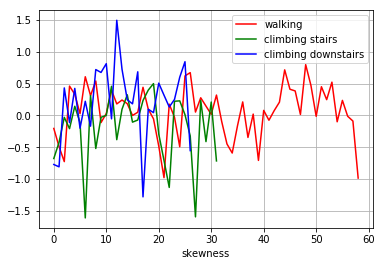

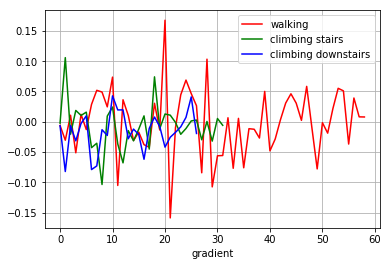

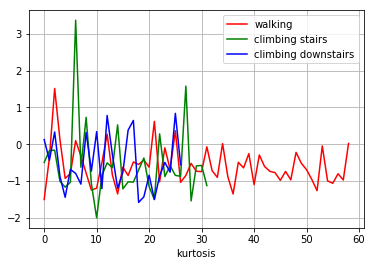

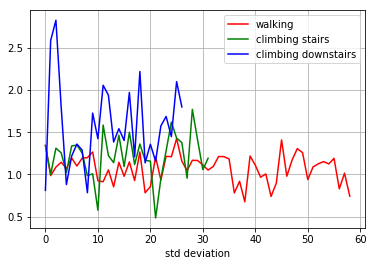

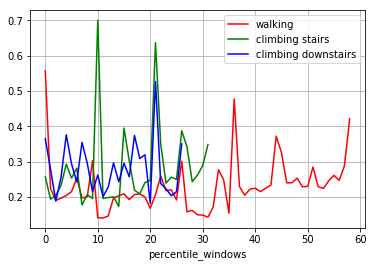

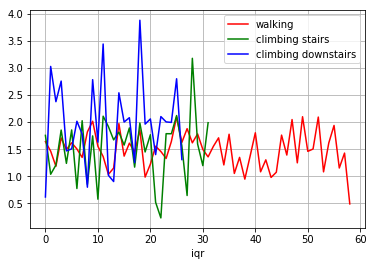

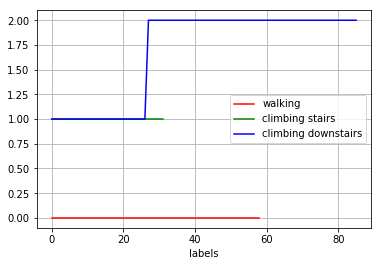

In [33]:
for dict_values in windows_y_map.values():
    fig = plt.figure()
    plt.plot(dict_values['values'][:len(w_x_skew)], c='r', label='walking')
    plt.plot(dict_values['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)],c='g', label='climbing stairs')
    plt.plot(dict_values['values'][len(x_skew)-len(d_x_skew):], c='b', label='climbing downstairs')    
    ax = plt.subplot()
    ax.set_xlabel(dict_values['legend'])
#     ax.set_ylabel(windows_x_map[combo[1]]['legend'])
    ax.legend()
    ax.grid(True)
    plt.show()

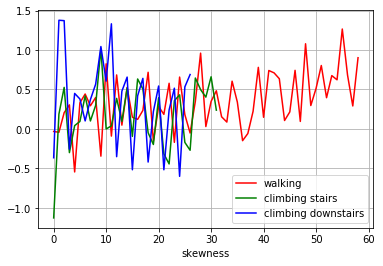

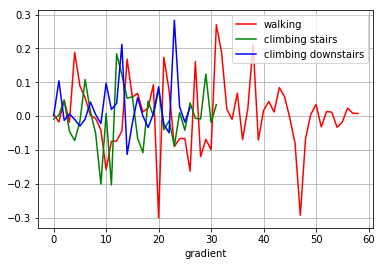

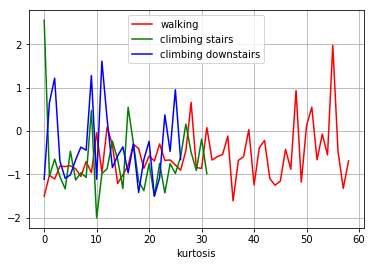

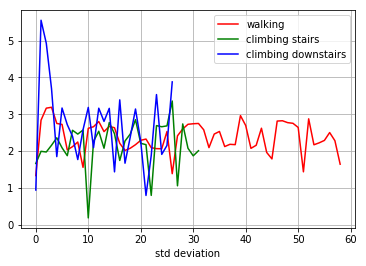

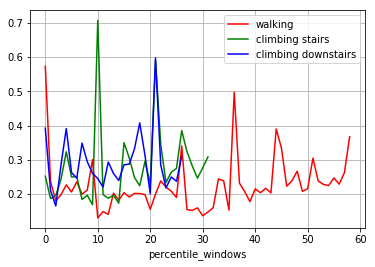

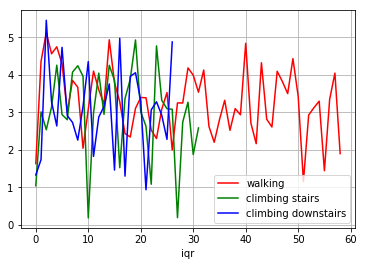

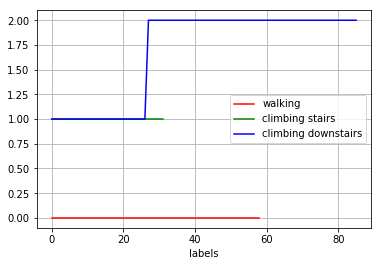

In [32]:
for dict_values in windows_z_map.values():
    fig = plt.figure()
    plt.plot(dict_values['values'][:len(w_x_skew)], c='r', label='walking')
    plt.plot(dict_values['values'][len(w_x_skew):len(w_x_skew) + len(c_x_skew)],c='g', label='climbing stairs')
    plt.plot(dict_values['values'][len(x_skew)-len(d_x_skew):], c='b', label='climbing downstairs')    
    ax = plt.subplot()
    ax.set_xlabel(dict_values['legend'])
#     ax.set_ylabel(windows_x_map[combo[1]]['legend'])
    ax.legend()
    ax.grid(True)
    plt.show()

In [29]:
len(windows_x_map.values())

7